In [18]:
# January 29th 2019 
# Random Forest Regression - a collection of Decision Trees 
# A non-linear model 

# Importing the libraries 
import numpy as np # included for mathematical operations
import matplotlib.pyplot as plt # plot nice charts in Python 
import pandas as pd # import datasets and manage datasets 
import os # Use this for folder and file manipulation

# Importing the dataset 
os.chdir('/Users/amandahutter/Documents/PythonCode/Udemy/MachineLearningA-Z/Part 2 - Regression/Section 9 - Random Forest Regression') 
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

X = dataset.iloc[:, 1:2].values # take all the rows, take all columns except the final one 
Y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#Data reshape for feature scaling transform 
#Y = Y.reshape(-1, 1)
#sc_X = StandardScaler() # make an object to scale X 
#sc_Y = StandardScaler() # make an object to scale Y
#X = sc_X.fit_transform(X) # using fit transform. This is fitted to X, cannot apply to Y
#Y = sc_Y.fit_transform(Y) # using fit transofrm. Fitted to Y, and then scaled. 

# Fitting the Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
# n_estimators = number of trees in your forest, default is 10. We tried 10, 100, and 300
regressor = RandomForestRegressor(n_estimators = 300, criterion = 'mse', random_state = 0)
regressor.fit(X, Y)

# Predicting a new result, use inverse transform for readability 
Y_Pred = regressor.predict([[6.5]])
print(f"The predicted value for someone at level 6.5 with a Decision Tree Regression is {Y_Pred}")


            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
The predicted value for someone at level 6.5 with a Decision Tree Regression is [ 160333.33333333]


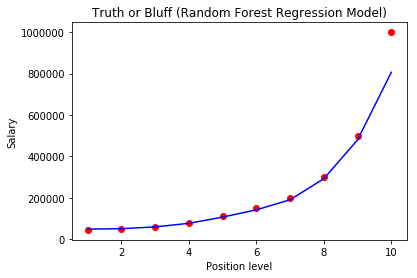

In [19]:
# Visualising the Regression results
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

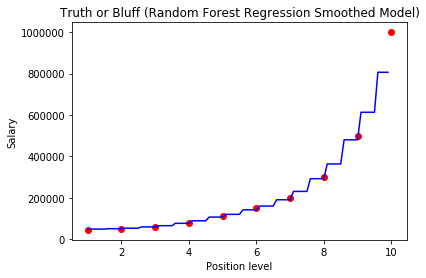

In [20]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression Smoothed Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

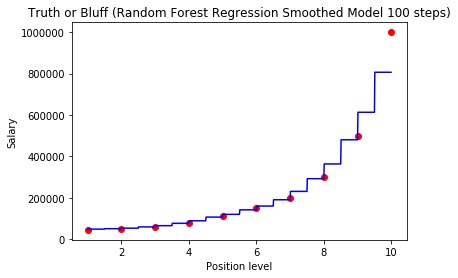

In [21]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression Smoothed Model 100 steps)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# When we choose 100 trees, we don't have 10X the amount of steps in the tree
Predictions for n trees:
1 tree : 150K
10 trees: 167K
100 trees: 158K 
With more trees, our guess is converging to the employee's actuary salary 